# __Problem 2__  
### proximal gradient method(PG) と accelerated proxmal gradient method(APG) の実装

In [12]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt

### 提示された問題設定の導入とハイパーパラメータの設定

In [13]:
A = np.array([[3,0.5],[0.5,1]])
mu = np.array([1,2])
la = LA.eig(2 * A)[0]
eta = 1/max(la)
loop = 50

### PGの実装 

In [14]:
class ProximalGradientMethod:
    """
    J(w)      :目的関数の計算
    update(w) :w の更新
    training():学習
    """
    def __init__(self, A, mu, eta = 1, lamda = 2, loop = 50):
        self.A = A
        self.mu = mu
        self.eta = eta
        self.lamda = lamda
        self.loop = loop
        self.w_hat_2 = np.array([0.82,1.09])
        self.w_hat_4 = np.array([0.64,0.18])
        self.w_hat_6 = np.array([0.33,0])
        
    def J(self,w):
        if self.lamda == 2:
            return LA.norm(w - self.w_hat_2)
        elif self.lamda == 4:
            return LA.norm(w - self.w_hat_4)
        elif self.lamda == 6:
            return LA.norm(w - self.w_hat_6)
        else:
            return np.inf
        
    def update(self,w):
        q = self.lamda * self.eta
        u = w - self.eta * 2 * self.A.dot(w - self.mu)
        w_ = np.zeros(2)
        for i in range(2):
            if u[i] > q:
                w_[i] = u[i] - q
            elif u[i] < -q:
                w_[i] = u[i] + q
            else:
                w_[i] = 0
        
        return w_
    
    def training(self):
        w = np.zeros(2)
        J_list = []
        for _ in range(self.loop):
            J_list.append(self.J(w))
            w = self.update(w)
        return J_list, w

### APGの実装 

In [15]:
class AccelaratedProximalGradientMethod:
    """
    J(w)                 :目的関数の計算
    update_v(w, w^t-1, q):v の更新
    update_w(v)          :w の更新
    training()           :学習
    """
    def __init__(self, A, mu, eta = 1, lamda = 2, loop = 50):
        self.A = A
        self.mu = mu
        self.eta = eta
        self.lamda = lamda
        self.loop = loop
        self.w_hat_2 = np.array([0.82,1.09])
        self.w_hat_4 = np.array([0.64,0.18])
        self.w_hat_6 = np.array([0.33,0])
        
    def J(self, w):
        if self.lamda == 2:
            return LA.norm(w - self.w_hat_2)
        elif self.lamda == 4:
            return LA.norm(w - self.w_hat_4)
        elif self.lamda == 6:
            return LA.norm(w - self.w_hat_6)
        else:
            return np.inf
    
    def update_v(self, w, w_old,q):
        return w + q * (w - w_old)
    
    def update_w(self, v):
        q = self.lamda * self.eta
        u = v - self.eta * 2 * self.A.dot(v - self.mu)
        w_ = np.zeros(2)
        for i in range(2):
            if u[i] > q:
                w_[i] = u[i] - q
            elif u[i] < -q:
                w_[i] = u[i] + q
            else:
                w_[i] = 0
        
        return w_
    
    def training(self):
        w = np.zeros(2)
        v = np.zeros(2)
        J_list = []
        for i in range(self.loop):
            q = i/(i+3)
            w_old = w
            J_list.append(self.J(w))
            w = self.update_w(v)
            v = self.update_v(w,w_old,q)
        return J_list, w

### $\lambda$ ごとに実行 

In [16]:
J_dict_pgm = {}
w_dict_pgm = {}
J_dict_apgm = {}
w_dict_apgm = {}
for l in [2,4,6]:
    clr = ProximalGradientMethod(A, mu, eta = eta, lamda = l, loop = loop)
    clr2 = AccelaratedProximalGradientMethod(A, mu, eta = eta, lamda = l, loop = loop)
    J_dict_pgm[f"{l}"], w_dict_pgm[f"{l}"] = clr.training()
    J_dict_apgm[f"{l}"], w_dict_apgm[f"{l}"] = clr2.training()

### 目的関数の推移グラフの表示

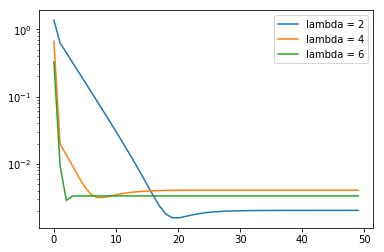

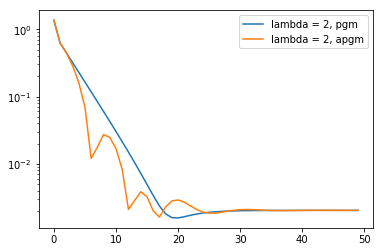

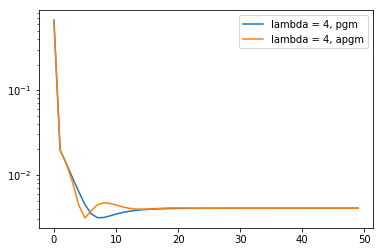

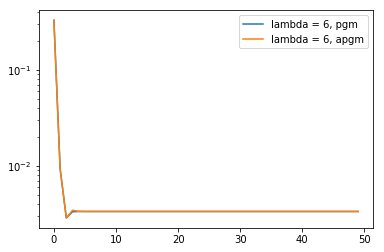

In [17]:
t = np.arange(loop)

fig1 = plt.figure()
plt.yscale("log")
p2 = plt.plot(t,J_dict_pgm["2"])
p4 = plt.plot(t,J_dict_pgm["4"])
p6 = plt.plot(t,J_dict_pgm["6"])
plt.legend((p2[0],p4[0],p6[0]),("lambda = 2", "lambda = 4", "lambda = 6"))
plt.show()

fig2 = plt.figure()
plt.yscale("log")
p2 = plt.plot(t,J_dict_pgm["2"])
p2_2 = plt.plot(t,J_dict_apgm["2"])
plt.legend((p2[0],p2_2[0]),("lambda = 2, pgm", "lambda = 2, apgm"))
plt.show()

fig3 = plt.figure()
plt.yscale("log")
p4 = plt.plot(t,J_dict_pgm["4"])
p4_2 = plt.plot(t,J_dict_apgm["4"])
plt.legend((p4[0],p4_2[0]),("lambda = 4, pgm", "lambda = 4, apgm"))
plt.show()

fig4 = plt.figure()
plt.yscale("log")
p6 = plt.plot(t,J_dict_pgm["6"])
p6_2 = plt.plot(t,J_dict_apgm["6"])
plt.legend((p6[0],p6_2[0]),("lambda = 6, pgm", "lambda = 6, apgm"))
plt.show()